<a href="https://colab.research.google.com/github/Raunaq14/Data_Sci_Research/blob/main/Copy_of_Colab_ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load merged 2023 data
file_path = "/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/final_data_with_foi_2023.csv"
df = pd.read_csv(file_path, dtype=str, low_memory=False)

print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (2084293, 119)


,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED_x,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT_y,FOI_TEXT
0,17328968,NaN,NaN,NaN,1,2023/07/14,NOBELREPLACE CC PMC RP 4.3X11.5MM,ENDOSSEOUS DENTAL IMPLANT,NOBEL BIOCARE USA INC,22725 SAVI RANCH,...,NaN,NaN,NaN,NaN,NaN,319068212,D,0,NaN,IMPLANT FAILED DUE TO A FAILURE TO OSSEOINTEGRATE
1,17328969,NaN,NaN,NaN,1,2023/07/14,NOBELPARALLEL CC NP 3.75X8.5MM,ENDOSSEOUS DENTAL IMPLANT,NOBEL BIOCARE AB,DIMBOVÄGEN 2,...,NaN,N,1,NaN,NaN,319068209,D,0,NaN,IMPLANT FAILED DUE TO A LOSS OF OSSEOINTEGRATION
2,17328970,NaN,NaN,NaN,1,2023/07/14,NOBELACTIVE INTERNAL NP 3.5X10MM,ENDOSSEOUS DENTAL IMPLANT,NOBEL BIOCARE AB,DIMBOVÄGEN 2,...,NaN,N,1,NaN,NaN,319068229,D,0,NaN,IMPLANT FAILED DUE TO A LOSS OF OSSEOINTEGRATION
3,17328971,NaN,NaN,NaN,1,2023/07/14,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,...,NaN,N,1,NaN,NaN,319094476,N,0,NaN,(B)(4).
4,17328971,NaN,NaN,NaN,1,2023/07/14,DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM,CONTINUOUS GLUCOSE MONITOR,"DEXCOM, INC.",6340 SEQUENCE DR.,...,NaN,N,1,NaN,NaN,319094477,D,0,NaN,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...


In [ ]:
# Check how many records exist for each device brand
device_counts = df['BRAND_NAME'].value_counts().head(10)
print(device_counts)

BRAND_NAME
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM       214421
T:SLIM X2 INSULIN PUMP WITH CONTROL-IQ TECHNOLOGY    127242
ALARIS SYSTEM                                        114009
DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM        59358
LIBRE 2 SENSOR FREESTYLE                              25607
MINIMED 770G US SYSTEM BLE CONNECT 3.0 MG/DL          24288
CAPSUREFIX NOVUS LEAD MRI SURESCAN                    22814
OMNIPOD 5 POD                                         19033
FREESTYLE LIBRE 2                                     16781
670G INSULIN PUMP MMT-1780KL                          13943
Name: count, dtype: int64


In [ ]:
# Define the 4 devices you're focusing on
target_devices = [
    "DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM",
    "DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM",
    "OMNIPOD 5 POD",
    "LIBRE 2 SENSOR FREESTYLE"
]

# Filter
df_filtered = df[df['BRAND_NAME'].isin(target_devices)].copy()
print("✅ Filtered dataset shape:", df_filtered.shape)

# Check count per device
print(df_filtered['BRAND_NAME'].value_counts())

# Save if needed
df_filtered.to_csv("/content/drive/MyDrive/Extracted_FDA_Data/filtered_devices_2034.csv", index=False)

✅ Filtered dataset shape: (318419, 119)
BRAND_NAME
DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM    214421
DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM     59358
LIBRE 2 SENSOR FREESTYLE                           25607
OMNIPOD 5 POD                                      19033
Name: count, dtype: int64


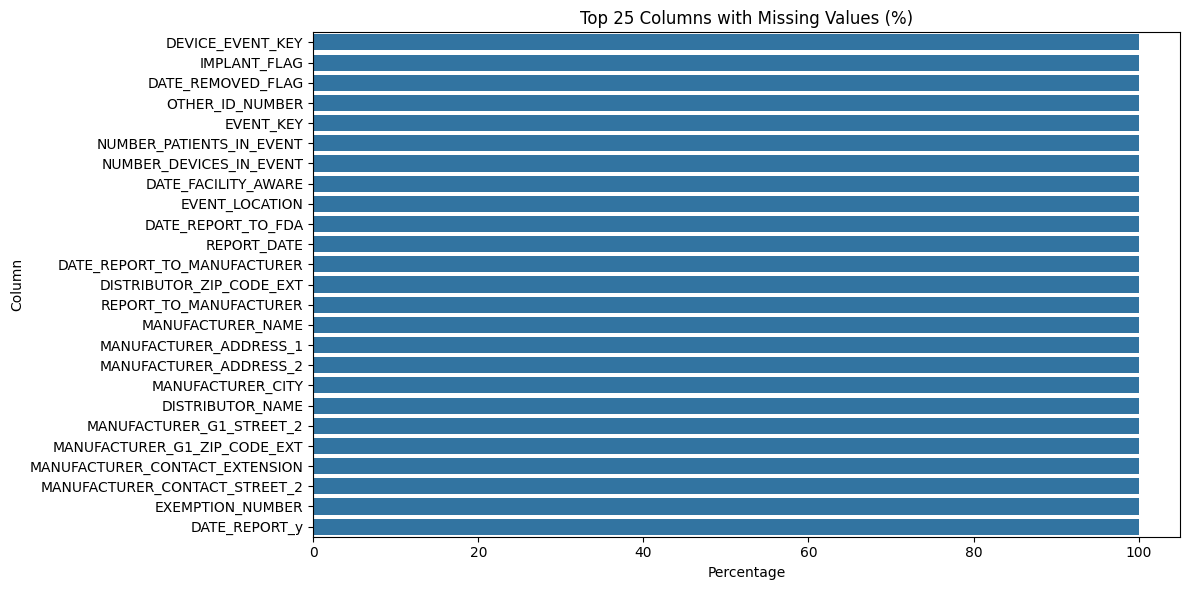

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing value percentage
missing_percent = df_filtered.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]

# Plot top 25 columns with missing data
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent[:25].values, y=missing_percent[:25].index)
plt.title("Top 25 Columns with Missing Values (%)")
plt.xlabel("Percentage")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

In [ ]:
# Drop columns with more than 90% missing values
threshold = 0.9
missing_ratio = df_filtered.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

print(f"🔍 Dropping {len(cols_to_drop)} columns with >90% missing values...")
df_filtered.drop(columns=cols_to_drop, inplace=True)
print("✅ Remaining columns:", df_filtered.shape[1])

🔍 Dropping 51 columns with >90% missing values...
✅ Remaining columns: 68


In [ ]:
df_filtered.columns

Index(['MDR_REPORT_KEY', 'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED_x', 'BRAND_NAME',
       'GENERIC_NAME', 'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_CITY', 'MANUFACTURER_D_STATE_CODE',
       'MANUFACTURER_D_ZIP_CODE', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'DEVICE_AVAILABILITY', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC', 'REPORT_NUMBER',
       'REPORT_SOURCE_CODE', 'MANUFACTURER_LINK_FLAG_', 'DATE_RECEIVED_y',
       'ADVERSE_EVENT_FLAG', 'PRODUCT_PROBLEM_FLAG', 'DATE_REPORT_x',
       'DATE_OF_EVENT', 'REPROCESSED_AND_REUSED_FLAG',
       'REPORTER_OCCUPATION_CODE', 'HEALTH_PROFESSIONAL',
       'MANUFACTURER_CONTACT_T_NAME', 'MANUFACTURER_CONTACT_F_NAME',
       'MANUFACTURER_CONTACT_L_NAME', 'MANUFACTURER_CONTACT

In [ ]:
import re

def clean_foitext(text):
    if pd.isna(text):
        return ""
    # Lowercase
    text = text.lower()

    # Remove boilerplate FDA phrases
    boilerplate_patterns = [
        r'the information received.*?intended to.*?\.',  # example phrase pattern
        r'this text has not been.*?accuracy\.',          # generic FDA disclaimers
    ]
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.DOTALL)

    # Remove punctuation, digits, and extra whitespace
    text = re.sub(r'[\d]+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # collapse whitespace

    return text.strip()

# Apply the cleaning function
df_filtered['cleaned_foitext'] = df_filtered['FOI_TEXT'].apply(clean_foitext)

# Check a sample
df_filtered[['FOI_TEXT', 'cleaned_foitext']].head()

,FOI_TEXT,cleaned_foitext
3,(B)(4).,b
4,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,it was reported that transmitter failed error ...
58,THE PRODUCT HAS BEEN REQUESTED BACK FOR INVEST...,the product has been requested back for invest...
59,A CUSTOMER REPORTED RECEIVING ERRONEOUS GLUCOS...,a customer reported receiving erroneous glucos...
60,REPEATED ATTEMPTS BY ADC TO RETRIEVE THE PRODU...,repeated attempts by adc to retrieve the produ...


In [ ]:
df_filtered.to_csv("/content/drive/MyDrive/Extracted_FDA_Data/filtered_cleaned_devices_2023.csv", index=False)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # explicitly request this
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def get_top_words(texts, top_n=20):
    all_words = []
    for text in texts:
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalpha() and word not in stop_words]
        all_words.extend(words)
    return Counter(all_words).most_common(top_n)

device_keywords = {}
for device in df_filtered['BRAND_NAME'].unique():
    texts = df_filtered[df_filtered['BRAND_NAME'] == device]['cleaned_foitext'].dropna()
    device_keywords[device] = get_top_words(texts)

# Show top 10 for each device
for device, keywords in device_keywords.items():
    print(f"\n🔍 {device} - Top Keywords:")
    for word, count in keywords[:10]:
        print(f"{word}: {count}")


🔍 DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM - Top Keywords:
reported: 230009
b: 129323
cause: 106368
probable: 105215
allegation: 105064
medical: 104615
loss: 104586
occurred: 104398
intervention: 104262
injury: 104142

🔍 LIBRE 2 SENSOR FREESTYLE - Top Keywords:
product: 67400
sensor: 66646
risk: 51523
results: 35982
report: 28091
associated: 25670
care: 25612
abbott: 25610
diabetes: 25610
libre: 24548

🔍 DEXCOM G7 CONTINUOUS GLUCOSE MONITORING SYSTEM - Top Keywords:
reported: 64316
b: 38100
loss: 31881
cause: 30135
probable: 29672
allegation: 29414
medical: 28871
intervention: 28773
injury: 28741
occurred: 28415

🔍 OMNIPOD 5 POD - Top Keywords:
pod: 25526
reported: 20788
cannula: 19903
lot: 17654
device: 16744
pdm: 12220
site: 10720
infusion: 10378
investigation: 9975
patient: 9746


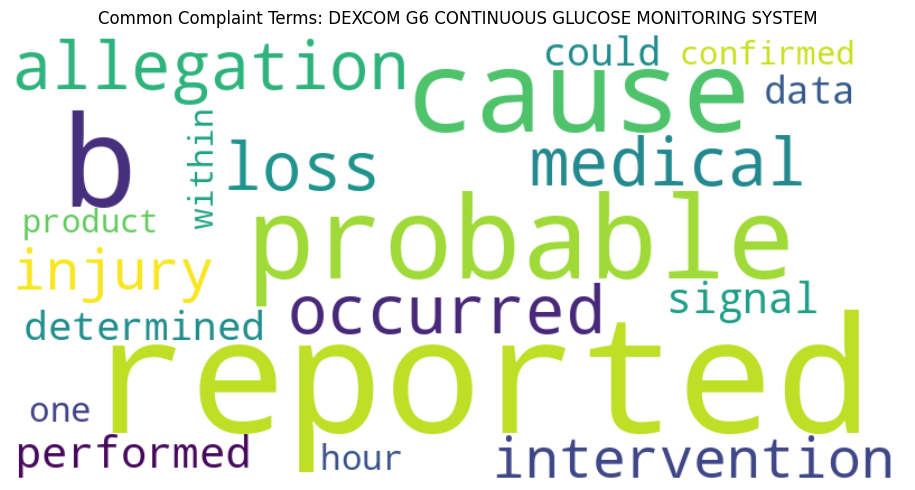

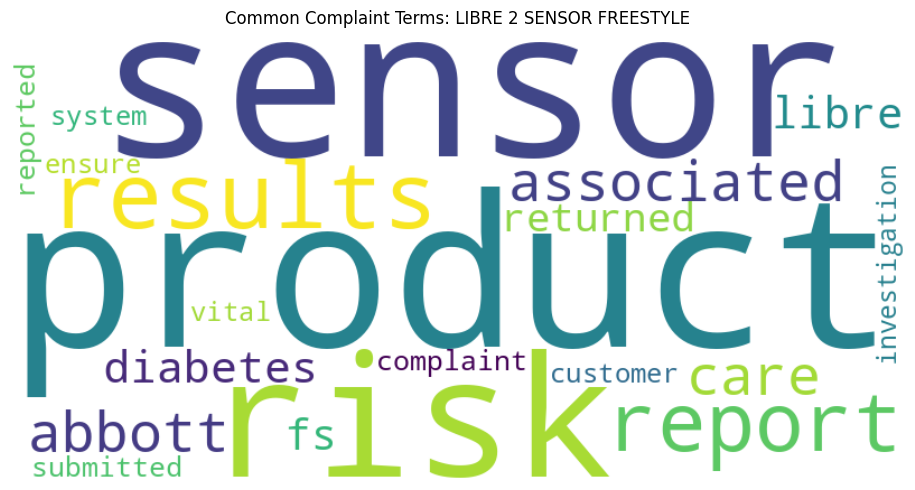

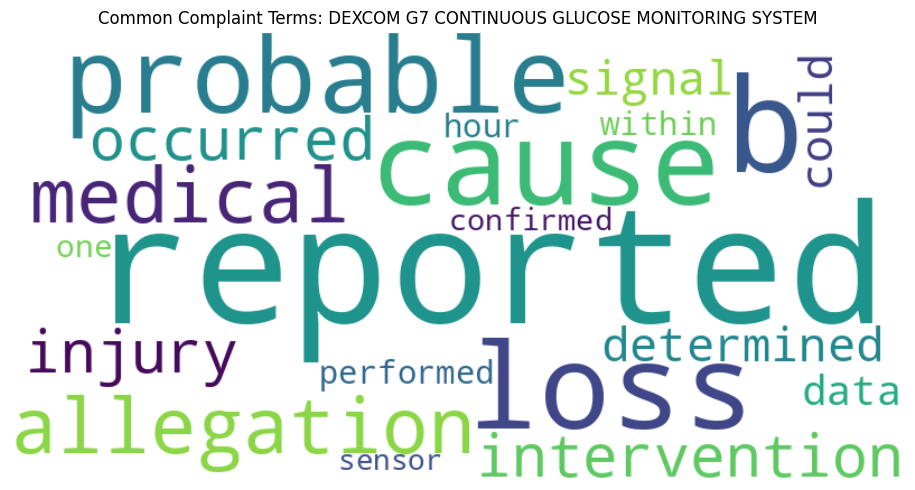

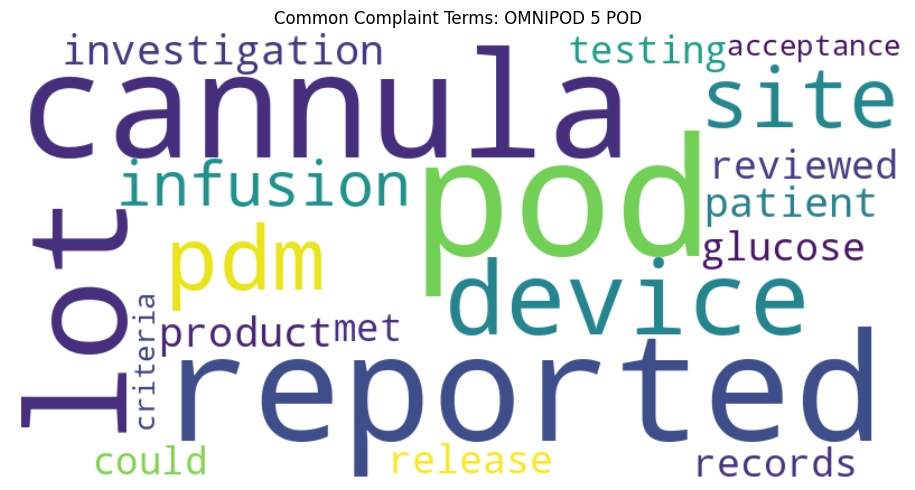

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for device, keywords in device_keywords.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Common Complaint Terms: {device}")
    plt.tight_layout()
    plt.show()

## Step 1A: Define Keyword-to-Category Mapping

In [ ]:
keyword_to_category = {
    # 🚨 Malfunctions
    "sensor": "Malfunction",
    "pod": "Malfunction",
    "cannula": "Malfunction",
    "infusion": "Malfunction",
    "site": "Malfunction",
    "pdm": "Malfunction",
    "device": "Malfunction",

    # 🏥 Medical Risk
    "injury": "Medical Risk",
    "intervention": "Medical Risk",
    "cause": "Medical Risk",
    "medical": "Medical Risk",
    "occurred": "Medical Risk",
    "allegation": "Medical Risk",
    "patient": "Medical Risk",  # optional

    # 📄 Complaints
    "complaint": "Complaint",
    "report": "Complaint",
    "risk": "Complaint",
    "returned": "Complaint",
    "results": "Complaint",
    "investigation": "Complaint",  # optional

    # 📦 Logistics
    "lot": "Logistics",
    "product": "Logistics",

    # 🏭 Manufacturer
    "abbott": "Manufacturer",
    "dexcom": "Manufacturer",
    "tandem": "Manufacturer",
}

## Step 1B: Add Category Tags to Each FOI Row

In [ ]:
import numpy as np


ignore_keywords = {"reported", "b", "diabetes", "care"}

def tag_issue_categories(text, keyword_map):
    if pd.isna(text):
        return []
    text = text.lower()
    matched_categories = set()
    for keyword, category in keyword_map.items():
        if keyword in ignore_keywords:  # ✅ skip noisy keywords
            continue
        if keyword.lower() in text:
            matched_categories.add(category)
    return list(matched_categories)

# Apply to your DataFrame
df_filtered['issue_categories'] = df_filtered['cleaned_foitext'].apply(lambda x: tag_issue_categories(x, keyword_to_category))

# Example output
print(df_filtered[['BRAND_NAME', 'issue_categories']].head())

                                        BRAND_NAME  \
3   DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM   
4   DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM   
58                        LIBRE 2 SENSOR FREESTYLE   
59                        LIBRE 2 SENSOR FREESTYLE   
60                        LIBRE 2 SENSOR FREESTYLE   

                                     issue_categories  
3                                                  []  
4                           [Medical Risk, Complaint]  
58               [Logistics, Manufacturer, Complaint]  
59  [Malfunction, Manufacturer, Logistics, Complai...  
60  [Malfunction, Manufacturer, Logistics, Complai...  


In [ ]:
def generate_summary(row):
    brand = row['BRAND_NAME']
    categories = ", ".join(row['issue_categories']) if row['issue_categories'] else "Uncategorized"
    snippet = row['cleaned_foitext'][:300] if pd.notna(row['cleaned_foitext']) else "No FOI text available"
    return f"Device: {brand} | Issues: {categories} | Description: {snippet}"

df_filtered['summary_chunk'] = df_filtered.apply(generate_summary, axis=1)

# Show sample
df_filtered[['summary_chunk']].sample(5, random_state=42)

,summary_chunk
1043342,Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORIN...
660141,Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORIN...
666700,Device: DEXCOM G7 CONTINUOUS GLUCOSE MONITORIN...
1027053,Device: LIBRE 2 SENSOR FREESTYLE | Issues: Mal...
1149997,Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORIN...


In [ ]:
# Export for manual check (optional)
df_filtered[['MDR_REPORT_KEY', 'BRAND_NAME', 'issue_categories', 'summary_chunk']].to_csv(
    '/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/device_foi_chunks_2023.csv',
    index=False
)

In [ ]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
import numpy as np

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode summaries in batches (to save memory)
batch_size = 2048
embeddings = []

summary_chunks = df_filtered['summary_chunk'].tolist()

for i in range(0, len(summary_chunks), batch_size):
    batch = summary_chunks[i:i+batch_size]
    emb = model.encode(batch, show_progress_bar=True)
    embeddings.extend(emb)

# Convert to NumPy array
embeddings_np = np.array(embeddings)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
# Save metadata for reference (adjust columns as needed)
df_filtered[['MDR_REPORT_KEY', 'BRAND_NAME', 'issue_categories', 'summary_chunk']].to_csv(
    "/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_meta_2023.csv",
    index=False
)

# Save embeddings as compressed NumPy file
np.savez_compressed(
    "/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_2023.npz",
    embeddings=embeddings_np
)

print("✅ Both metadata and embeddings saved successfully.")

✅ Both metadata and embeddings saved successfully.


In [ ]:
# Load saved metadata
df_meta = pd.read_csv("/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_meta_2024.csv")

# Load saved embeddings
data = np.load("/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_2024.npz")
embeddings_np = data['embeddings']

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def search_foi(query, model, embeddings, df_meta, top_k=5):
    # Encode the query
    query_embedding = model.encode([query])

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, embeddings)[0]

    # Get top K results
    top_indices = similarities.argsort()[::-1][:top_k]

    # Return top matches with similarity scores
    results = df_meta.iloc[top_indices].copy()
    results['similarity'] = similarities[top_indices]
    return results

In [ ]:
query = "Which device had issues with cannula dislodgement?"

results = search_foi(
    query=query,
    model=model,
    embeddings=embeddings_np,
    df_meta=df_meta,
    top_k=5  # You can increase to 10 later
)

pd.set_option('display.max_colwidth', None)  # Show full text
print("🔍 Top Matching Results:\n")
display(results[['BRAND_NAME', 'issue_categories', 'summary_chunk', 'similarity']])

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


🔍 Top Matching Results:



,BRAND_NAME,issue_categories,summary_chunk,similarity
706458,OMNIPOD 5 POD,"['Complaint', 'Malfunction', 'Logistics']","Device: OMNIPOD 5 POD | Issues: Complaint, Malfunction, Logistics | Description: the device has not been returnedreceived to date if the device is received a supplemental report will be submitted with the investigation results it was reported that the cannula had dislodged from the infusion site we are unable to confirm the bent cannula or to determine if it could have contribut",0.629713
845646,OMNIPOD 5 POD,"['Complaint', 'Malfunction', 'Medical Risk']","Device: OMNIPOD 5 POD | Issues: Complaint, Malfunction, Medical Risk | Description: the received device had the cannula assembly fully deployed no issues were observed with the soft cannula that would contribute to the soft cannula becoming dislodged a root cause for the reported dislodged cannula could not be determined the received device had the cannula assembly fully deployed i",0.622215
871862,OMNIPOD 5 POD,"['Complaint', 'Malfunction', 'Medical Risk']","Device: OMNIPOD 5 POD | Issues: Complaint, Malfunction, Medical Risk | Description: the received device had the cannula assembly fully deployed no issues were observed with the soft cannula that would contribute to the soft cannula becoming dislodged a root cause for the reported dislodged cannula could not be determined the received device had the cannula assembly fully deployed i",0.622215
520243,OMNIPOD 5 POD,"['Complaint', 'Malfunction', 'Medical Risk']","Device: OMNIPOD 5 POD | Issues: Complaint, Malfunction, Medical Risk | Description: the returned device was evaluated and the received device had the cannula assembly fully deployed no issues were observed with the soft cannula that would contribute to the soft cannula becoming dislodged a root cause for the reported dislodged cannula could not be determined the pod was returned wi",0.618040
472433,OMNIPOD 5 POD,"['Complaint', 'Malfunction', 'Medical Risk']","Device: OMNIPOD 5 POD | Issues: Complaint, Malfunction, Medical Risk | Description: the returned device was evaluated and the received device had the cannula assembly fully deployed no issues were observed with the soft cannula that would contribute to the soft cannula becoming dislodged a root cause for the reported dislodged cannula could not be determined",0.617060


## NEXT STEP

In [ ]:
import re
import nltk
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util

nltk.download('punkt')
nltk.download('stopwords')

def extract_keywords(text, top_n=3):
    """Extracts top keywords from the user query using simple token frequency"""
    tokens = word_tokenize(text.lower())
    filtered = [w for w in tokens if w.isalpha() and w not in stopwords.words('english')]
    freq = pd.Series(filtered).value_counts()
    return freq.head(top_n).index.tolist()

def answer_query_insightfully(query, df, embeddings, top_k=10, plot_chart=True):
    # Load model
    model = SentenceTransformer('all-MiniLM-L6-v2', device='cpu')
    query_embedding = model.encode(query, convert_to_tensor=True)

    # Compute cosine similarity
    embeddings_tensor = torch.tensor(embeddings).to('cpu')
    similarities = util.cos_sim(query_embedding, embeddings_tensor)[0].numpy()

    # Score + sort
    df_temp = df.copy()
    df_temp["similarity"] = similarities
    df_sorted = df_temp.sort_values(by="similarity", ascending=False)

    # Extract keywords from query
    extracted_keywords = extract_keywords(query)
    keyword_pattern = '|'.join([re.escape(k) for k in extracted_keywords])
    df_sorted = df_sorted[df_sorted["summary_chunk"].str.contains(keyword_pattern, case=False, na=False)]

    if df_sorted.empty:
        return "❌ Sorry, no relevant results found for your query.", pd.DataFrame()

    # Top results & count by device
    top_results = df_sorted.head(top_k)
    device_counts = top_results["BRAND_NAME"].value_counts()
    top_device = device_counts.idxmax()
    top_device_count = device_counts.max()

    # Clean issue list
    issue_list_raw = df_sorted[df_sorted['BRAND_NAME'] == top_device]['issue_categories'].values[0]
    issue_list_cleaned = issue_list_raw.strip("[]").replace("'", "").split(", ") if isinstance(issue_list_raw, str) else ["Not available"]

    # Examples
    example_rows = top_results[top_results["BRAND_NAME"] == top_device].head(3)
    examples = example_rows["summary_chunk"].astype(str).apply(lambda x: x.split('.')[0].strip()).tolist()

    # Text-based bar chart
    chart = "\n📊 **Relevant Devices:**\n"
    for device, count in device_counts.items():
        bar = "█" * (count * 10 // top_device_count)
        chart += f"{device:<60} | {bar} ({count})\n"

    # Matplotlib chart
    if plot_chart:
        plt.figure(figsize=(10, 4))
        device_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
        plt.title("Top Devices for Query")
        plt.xlabel("Relevant Report Count")
        plt.tight_layout()
        plt.show()

    # Final answer
    reply = f"""🔎 Based on your question, the device **{top_device}** had the highest number of relevant reports.
It appeared in **~{top_device_count}** top results related to your query.

🧾 Common issues reported:
- {', '.join(issue_list_cleaned[:3])}

📝 **Example Reports:**\n""" + "\n".join([f"{i+1}. *\"{ex}...\"*" for i, ex in enumerate(examples)])

    return reply, top_results[["MDR_REPORT_KEY", "BRAND_NAME", "issue_categories", "summary_chunk", "similarity"]]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


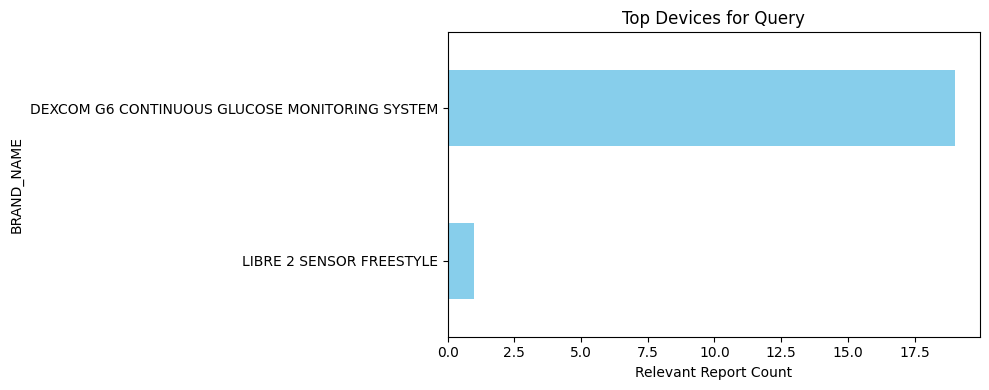

🔎 Based on your question, the device **DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM** had the highest number of relevant reports.
It appeared in **~19** top results related to your query.

🧾 Common issues reported:
- Complaint, Malfunction, Medical Risk

📝 **Example Reports:**
1. *"Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM | Issues: Complaint, Malfunction, Medical Risk | Description: it was reported that a sensor failure occurred date of event is an approximation the patient experienced a sensor failure which occurred the day the sensor was inserted into the abdomen of note the patient attempted to insert new sensors and all resulted in sensor failure this complaint captures inf..."*
2. *"Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM | Issues: Manufacturer, Complaint, Malfunction, Medical Risk | Description: it was reported that a sensor failure after warm up occurred the sensor was inserted into the abdomen the diabetes educator reported that the patient experi

In [ ]:
question = "Which sensor had the most battery failures?"
response, results_df = answer_query_insightfully(question, df_meta, embeddings_np, top_k=20)
print(response)

In [ ]:
insight, top_df = answer_query_insightfully(
    "Which device had battery problems?",
    df_meta,
    embeddings_np,
    top_k=5
)

print(insight)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


🔎 **Answer:**
The **DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM** had the most relevant FOI reports for your query, with **~5 matching entries**.

🧾 Common issues mentioned:
- Complaint, Manufacturer, Medical Risk

📝 **Examples:**
1. *"Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM | Issues: Complaint, Manufacturer, Medical Risk, Malfunction, Logistics | Description: it was reported that a transmitter battery issue occurred no product or data was provided for evaluation the allegation and a probable cause could not be determined no injury or medical intervention was reported tandem ts trouble the issue still the tx battery low child asking for a replacement of a..."*
2. *"Device: DEXCOM G6 CONTINUOUS GLUCOSE MONITORING SYSTEM | Issues: Complaint, Medical Risk, Logistics | Description: it was reported that a transmitter battery issue occurred performance data was reviewed the allegation was confirmed due to the finding of a transmitter failed error within the investigation wi

## NEXT STEP

# FINAL STEP

In [ ]:
!pip install streamlit sentence-transformers
!apt-get install -y libglib2.0-0 libsm6 libxrender1 libxext6

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1build2).
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender1 is already the newest version (1:0.9.10-1build4).
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.5).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!mkdir -p /content/ollama_chatbot

In [ ]:
!cp /content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_2024.npz /content/ollama_chatbot/embeddings.npz
!cp /content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_meta_2024.csv /content/ollama_chatbot/embedded_foi_meta.csv

In [ ]:
!pip install -q streamlit pyngrok

In [ ]:
%%writefile /content/ollama_chatbot/app.py
import streamlit as st
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_meta_2024.csv")
embeddings = np.load("/content/drive/MyDrive/Extracted_FDA_Data/final_merged_data/embedded_foi_2024.npz")["embeddings"]

# Load model
model = SentenceTransformer("all-MiniLM-L6-v2", device="cpu")

# Store conversation
if "history" not in st.session_state:
    st.session_state.history = []

def get_response(query, top_k=5, keyword_filter=None):

    query_embedding = model.encode(query, convert_to_tensor=True)
    similarities = util.cos_sim(query_embedding, torch.tensor(embeddings))[0].numpy()

    df_temp = df.copy()
    df_temp["similarity"] = similarities
    df_sorted = df_temp.sort_values("similarity", ascending=False)

    positive_keywords = ["successful", "best", "liked", "safest", "effective"]
    negative_indicators = ["malfunction", "complaint", "risk", "failure", "damaged", "issue"]

    if any(pos_kw in query.lower() for pos_kw in positive_keywords):
        st.warning("⚠️ This dataset only includes FDA adverse event reports, so we can't determine true 'success' or satisfaction. Results reflect reported problems only.")

    # Then filter out obviously negative examples when the query is positive
    if any(pos_kw in query.lower() for pos_kw in positive_keywords):
        df_sorted = df_sorted[~df_sorted["summary_chunk"].str.contains("|".join(negative_indicators), case=False, na=False)]

    if keyword_filter:
        df_sorted = df_sorted[df_sorted["summary_chunk"].str.contains(keyword_filter, case=False, na=False)]

    top_results = df_sorted.head(top_k)
    device_counts = top_results["BRAND_NAME"].value_counts()

    if device_counts.empty:
        return "❌ Sorry, I couldn’t find any relevant results for your query.", []

    top_device = device_counts.idxmax()
    top_device_count = device_counts.max()

    example_rows = top_results[top_results["BRAND_NAME"] == top_device].head(3)
    cleaned_examples = []
    for text in example_rows["summary_chunk"]:
        sentence = text.split(".")[0].strip()
        cleaned = sentence.replace("Device:", "").replace("Description:", "").replace("|", "•").replace("Issues:", "Reported issues:")
        cleaned_examples.append(cleaned)

    try:
        issue_list_raw = top_results[top_results['BRAND_NAME'] == top_device]['issue_categories'].values[0]
        issue_list_clean = issue_list_raw.strip("[]").replace("'", "").split(", ")
    except:
        issue_list_clean = ["Not available"]

    topic_term = query.strip("?").split()[-1]
    reply = f"""
🧠 **Insight:**
The **{top_device}** appears most relevant to your query regarding **{topic_term}**, with around **{top_device_count} matching entries**.

⚠️ **Frequent issues**: {', '.join(issue_list_clean[:3])}

💬 **Sample complaints:**
""" + "\n".join([f"- _{ex}..._" for ex in cleaned_examples])

    # Chart
    with st.expander("📊 See Top Matching Devices"):
        fig, ax = plt.subplots()
        top_device_counts = device_counts.head(5)
        ax.barh(top_device_counts.index[::-1], top_device_counts.values[::-1], color="skyblue")
        ax.set_xlabel("Match Count")
        ax.set_title("Top Devices by Relevance")
        st.pyplot(fig)

    return reply

st.set_page_config(page_title="InsightPod", layout="wide")
st.title("🤖 InsightPod — Glucose Monitor Insight Assistant")

user_input = st.chat_input("Ask about glucose monitor issues...")

if user_input:
    with st.spinner("🔍 Scanning FOI reports..."):
        response = get_response(user_input)
        st.session_state.history.append(("You", user_input))
        st.session_state.history.append(("InsightPod", response))

# Show chat history
for speaker, message in st.session_state.history:
    if speaker == "You":
        st.markdown(f"**🧑‍💬 You:** {message}")
    else:
        st.markdown(f"**🤖 InsightPod:** {message}")

Overwriting /content/ollama_chatbot/app.py


In [ ]:
!ngrok config add-authtoken 30hFCUi4A0FwFCeMDr86wvl1E9z_5TKJmuLUg21UHLVULpNPE

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
ngrok.kill()

In [ ]:
!streamlit run /content/ollama_chatbot/app.py &>/content/logs.txt &

public_url = ngrok.connect(8501, "http")
print(f"🔗 Public URL: {public_url}")

🔗 Public URL: NgrokTunnel: "https://e73df9b1e0f8.ngrok-free.app" -> "http://localhost:8501"
